# Random Forest Result: Training Dataset

In this section, we will fit the random forest model to our training dataset and see its performance. We will use the tuned hyperparameters in the previous [section](TuningHPRF.ipynb).

In [38]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import numpy as np 
import pandas as pd 
import pickle

In [4]:
feature_matrix_train = pd.read_csv("./data/final_feature_matrix.csv", index_col = 0)
X = feature_matrix_train.drop("fraudulent", axis = 1).values
y = feature_matrix_train.fraudulent.values

In [5]:
rf_model = RandomForestClassifier(criterion = "gini",
                                  max_depth = 35,
                                  max_features = 24,
                                  n_estimators = 300,
                                  class_weight = {0:1, 1:1.6}
                                 )
rf_model.fit(X,y)

RandomForestClassifier(class_weight={0: 1, 1: 1.6}, max_depth=35,
                       max_features=24, n_estimators=300)

In [7]:
y_predict =rf_model.predict(X)

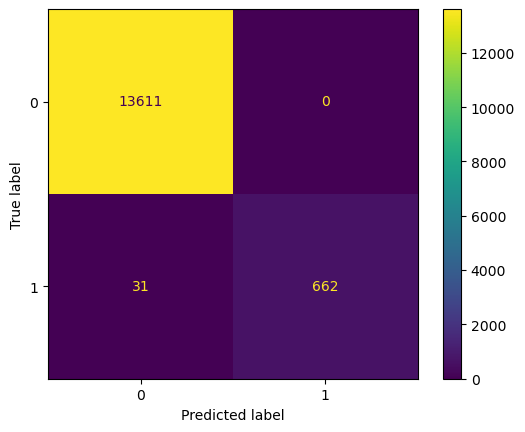

In [9]:
cm = confusion_matrix(y, y_predict, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()

In [11]:
print(classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      0.96      0.98       693

    accuracy                           1.00     14304
   macro avg       1.00      0.98      0.99     14304
weighted avg       1.00      1.00      1.00     14304



The trained model has 99.78% accuracy and 95.53% recall on the training set. The result seems satisfying. Compared to the model in the previous work, we can see a massive improvement in accuracy (97.99% to 99.78%) and recall (70.28% to 95.53%). However, the result still implies that our model could have been overfitted. 

## Feature Importance

The one convenient part of using the random forest model is that we can easily observe the feature importance.

In [27]:
feature_name = feature_matrix_train.drop("fraudulent", axis = 1).columns

In [36]:
importances_df = pd.DataFrame({"feature_names" : feature_name, 
                               "importances" : rf_model.feature_importances_})
importances_df.sort_values("importances", ascending = False).reset_index(drop = True)[0:10]

feature_names  importances
0          company_profile     0.077765
1         has_company_logo     0.047659
2    industry_Oil & Energy     0.046337
3                earn_desc     0.034458
4  function_Administrative     0.032784
5                time_desc     0.030940
6               requir_req     0.027134
7                 per_desc     0.024678
8               skill_desc     0.020639
9               posit_desc     0.020025

The result can imply several exciting characteristics of fake job postings:

1. Fake job postings tend not to show their company profile and logo. This is an obvious remark because it is easy to assume that a fake company will post a fake job posting, but our result clearly supports the assumption!

2. Fake job postings are more likely to be involved in the Oil & Energy industry and administrative positions. 

3. Fake job postings tend to include the word "earn" in their description more than genuine job postings. This makes sense because posting fake jobs is to lure innocent people who need money. 

In [39]:
with open('./pickle/rf_model.pkl', 'wb') as f:
        pickle.dump(rf_model, f)